In [1]:
import tensorflow as tf
from keras.datasets import cifar10

In [2]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 319s 2us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [9]:
disp_ind = []
for i in range(10):
  disp_ind.append(np.random.randint(0, X_train.shape[0]))

disp_ind

[48810, 32619, 10300, 30369, 30736, 45425, 12870, 2365, 3846, 21071]

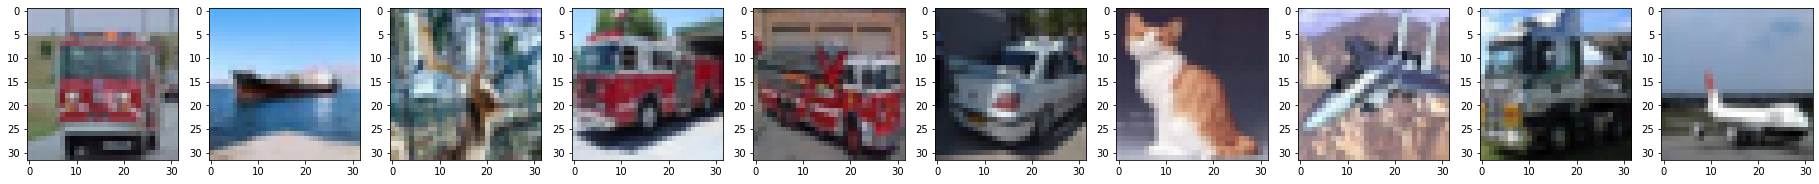

In [10]:
fig,ax = plt.subplots(1,10,figsize=(32,32))
for i in range(len(disp_ind)):
  ax[i].imshow(X_train[disp_ind[i]])

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train_ohe = to_categorical(y_train)
print(y_train_ohe.shape)
y_test_ohe = to_categorical(y_test)
print(y_test_ohe.shape)

(50000, 10)
(10000, 10)


In [13]:
X_train_flt = X_train.astype(float)
X_test_flt = X_test.astype(float)

X_train_norm = X_train_flt/255
X_test_norm = X_test_flt/255

print(X_train_norm.shape)
print(X_test_norm.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [14]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [15]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=20,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/20
1563/1563 [==============================] - 101s 60ms/step - loss: 1.3134 - accuracy: 0.5283 - val_loss: 1.0724 - val_accuracy: 0.6276
Epoch 2/20
1563/1563 [==============================] - 95s 61ms/step - loss: 0.8888 - accuracy: 0.6853 - val_loss: 0.9515 - val_accuracy: 0.6707
Epoch 3/20
1563/1563 [==============================] - 98s 63ms/step - loss: 0.6666 - accuracy: 0.7654 - val_loss: 1.0529 - val_accuracy: 0.6557
Epoch 4/20
1563/1563 [==============================] - 105s 67ms/step - loss: 0.4656 - accuracy: 0.8363 - val_loss: 0.9702 - val_accuracy: 0.6952
Epoch 5/20
1563/1563 [==============================] - 101s 64ms/step - loss: 0.2902 - accuracy: 0.8982 - val_loss: 1.1055 - val_accuracy: 0.6891
Epoch 6/20
1563/1563 [==============================] - 101s 65ms/step - loss: 0.1791 - accuracy: 0.9392 - val_loss: 1.3627 - val_accuracy: 0.6778
Epoch 7/20
1563/1563 [==============================] - 100s 64ms/step - loss: 0.1271 - accuracy: 0.9565 - val_loss: 1.5

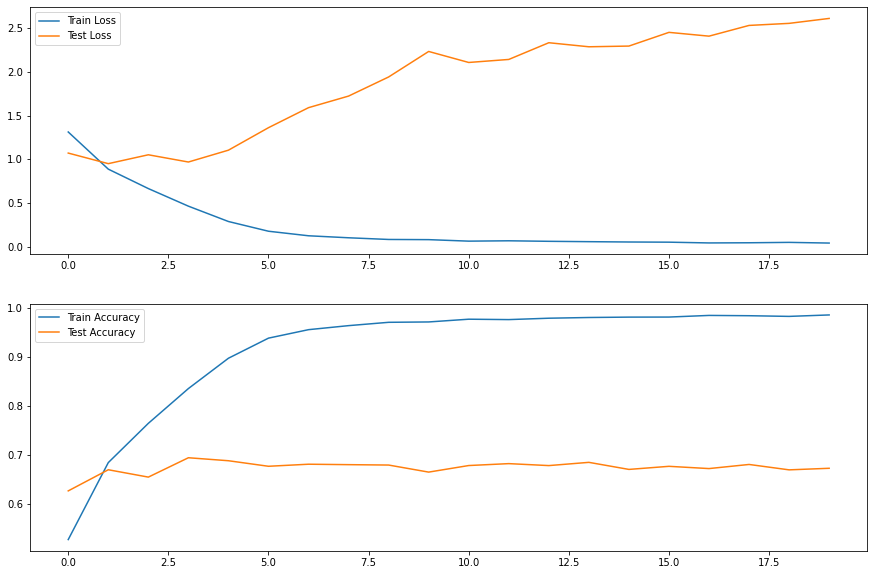

In [16]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 4s 11ms/step


<AxesSubplot:>

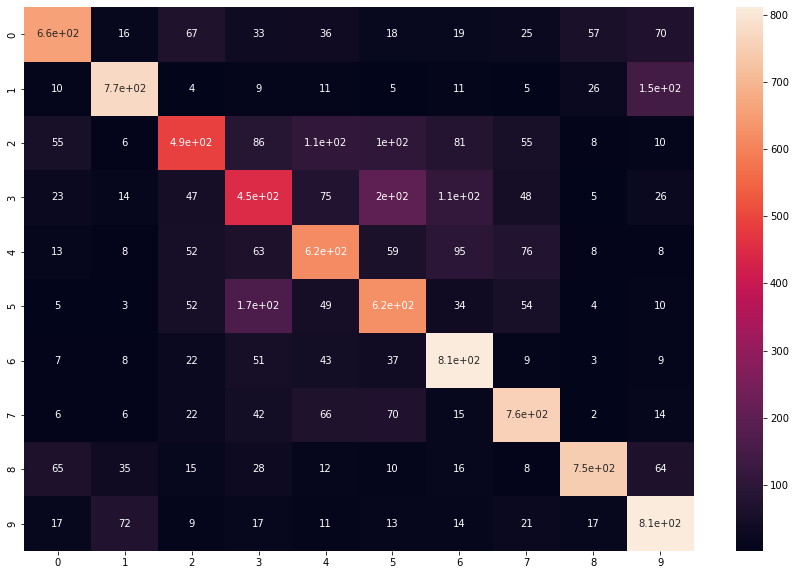

In [17]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Building a CNN Model with 2 VGG blocks and trained on train dataset

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=20,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/20
1563/1563 [==============================] - 125s 80ms/step - loss: 1.3288 - accuracy: 0.5158 - val_loss: 1.0259 - val_accuracy: 0.6338
Epoch 2/20
1563/1563 [==============================] - 129s 83ms/step - loss: 0.8632 - accuracy: 0.6992 - val_loss: 0.8090 - val_accuracy: 0.7163
Epoch 3/20
1563/1563 [==============================] - 126s 81ms/step - loss: 0.6607 - accuracy: 0.7689 - val_loss: 0.7935 - val_accuracy: 0.7298
Epoch 4/20
1563/1563 [==============================] - 125s 80ms/step - loss: 0.5009 - accuracy: 0.8242 - val_loss: 0.7947 - val_accuracy: 0.7485
Epoch 5/20
1563/1563 [==============================] - 133s 85ms/step - loss: 0.3651 - accuracy: 0.8722 - val_loss: 0.8648 - val_accuracy: 0.7402
Epoch 6/20
1563/1563 [==============================] - 131s 84ms/step - loss: 0.2581 - accuracy: 0.9098 - val_loss: 0.9353 - val_accuracy: 0.7434
Epoch 7/20
1563/1563 [==============================] - 132s 85ms/step - loss: 0.1890 - accuracy: 0.9358 - val_loss: 1

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

In [ ]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Building a CNN Model with 3 VGG blocks and trained on train dataset

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=20,validation_data=(X_test_norm,y_test_ohe))

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

In [ ]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding a dropout layer with dropout of 0.2 and trained on train dataset

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.2)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.2)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_test_norm,y_test_ohe))

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

In [ ]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding a dropout layer with dropout of 0.3 and trained on train dataset

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_test_norm,y_test_ohe))

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

In [ ]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding a dropout layer with dropout of 0.4 and trained on train dataset

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.4)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.4)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.4)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.4)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.4)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_test_norm,y_test_ohe))

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

In [ ]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding batch Normalization layer and trained on train dataset

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_test_norm,y_test_ohe))

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

In [ ]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding batch normalization improved the accuracy of the model from 79.17% to 86.12%

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation on train data and training the model on generated data along with train data

In [ ]:
datagen = ImageDataGenerator(height_shift_range=0.2,horizontal_flip=True)
it_train = datagen.flow(X_train_norm, y_train_ohe, batch_size=32)
history = model.fit(it_train, epochs=50, validation_data=(X_test_norm, y_test_ohe))

In [ ]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

In [ ]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)